In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import plotly.express as px


Bad key "text.kerning_factor" on line 4 in
C:\Users\mohda\anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


**Attributes Information**

mass_npea:  the mass of the area understudy for melanoma tumor

size_npear: the size of the area understudy for melanoma tumor

malign_ratio: ration of normal to malign surface understudy

damage_size: unrecoverable area of skin damaged by the tumor

exposed_area: total area exposed to the tumor

std_dev_malign: standard deviation of malign skin measurements

err_malign: error in malign skin measurements

malign_penalty: penalty applied due to measurement error in the lab

damage_ratio: the ratio of damage to total spread on the skin

tumor_size: size of melanoma_tumor

**Names of Columns**

In [4]:
df.columns.values

array(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio', 'tumor_size'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mass_npea,9146.0,9.903052e+03,4060.577116,2864.76000,6988.420000,8.895965e+03,1.211995e+04,3.699540e+04
size_npear,9146.0,3.032828e+03,1462.334147,510.53000,1983.657500,2.684330e+03,3.830745e+03,1.353500e+04
malign_ratio,9146.0,3.030829e-01,0.062533,0.11482,0.259053,3.010550e-01,3.430025e-01,5.253000e-01
damage_size,9146.0,1.039021e+02,55.456862,10.31010,64.012525,8.845830e+01,1.342090e+02,3.464200e+02
exposed_area,9146.0,1.372442e+06,564677.287032,387853.40250,959687.264300,1.237057e+06,1.693083e+06,4.978616e+06
std_dev_malign,9146.0,1.463042e+02,70.512177,31.97040,95.853900,1.261385e+02,1.822515e+02,5.288900e+02
err_malign,9146.0,3.992936e+03,1780.672859,1089.19000,3177.682500,3.846320e+03,4.664577e+03,9.198370e+04
malign_penalty,9146.0,6.984966e+01,55.785332,0.00000,31.000000,5.400000e+01,9.100000e+01,3.400000e+02
damage_ratio,9146.0,3.446165e+01,5.972808,15.22800,30.290225,3.524575e+01,3.880607e+01,4.654640e+01
tumor_size,9146.0,7.723348e+00,6.086852,0.00000,2.320000,5.060500e+00,1.333600e+01,2.099900e+01


**Missing Values**

In [7]:
df.isnull().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

Therefore There is no missing values in the Dataset

**looking for correlation with tumor size**

In [8]:
df.corr()['tumor_size'].sort_values(ascending=False)

tumor_size        1.000000
malign_ratio      0.374273
size_npear        0.164761
damage_ratio      0.054892
malign_penalty    0.011871
err_malign        0.004484
exposed_area     -0.003641
mass_npea        -0.004679
std_dev_malign   -0.030085
damage_size      -0.163804
Name: tumor_size, dtype: float64

**Feature Importance**

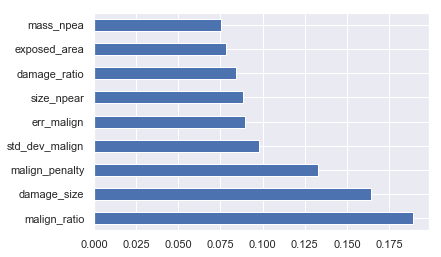

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
X = df.drop('tumor_size',axis=1)
y = df['tumor_size']
model = ExtraTreesRegressor()
model.fit(X,y)
feat_import = pd.Series(model.feature_importances_,index = X.columns)
feat_import.nlargest(9).plot(kind='barh')
plt.show()

Therefore malign_ratio,damage_size,malign_penality are the most important features

**Building a Model**

In [10]:
X = df.drop('tumor_size',axis=1).values
y = df['tumor_size'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
RMSE_score = []

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
s1 = np.mean(cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
s1 = np.sqrt(-s1)
RMSE_score.append(s1)

In [15]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
s2 = np.mean(cross_val_score(dt,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
s2 = np.sqrt(-s2)
RMSE_score.append(s2)

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
s3 = np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
s3 = np.sqrt(-s3)
RMSE_score.append(s3)

In [17]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
s4 = np.mean(cross_val_score(knn,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
s4 = np.sqrt(-s4)
RMSE_score.append(s4)

In [18]:
svr = SVR()
svr.fit(X_train,y_train)
s5 = np.mean(cross_val_score(svr,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
s5 = np.sqrt(-s5)
RMSE_score.append(s5)

In [19]:
cat = CatBoostRegressor(iterations=20,loss_function='MAE',eval_metric='RMSE',task_type='CPU')
cat.fit(X_train,y_train,verbose=False)
s6 = np.mean(cross_val_score(cat,X_train,y_train,scoring='neg_mean_squared_error',cv=10))
s6 = np.sqrt(-s6)
RMSE_score.append(s6)

0:	learn: 6.6061827	total: 5.22ms	remaining: 99.2ms
1:	learn: 6.5358665	total: 10.3ms	remaining: 92.5ms
2:	learn: 6.4695384	total: 15ms	remaining: 84.8ms
3:	learn: 6.4017376	total: 19.9ms	remaining: 79.7ms
4:	learn: 6.3404739	total: 25ms	remaining: 74.9ms
5:	learn: 6.2820971	total: 31.2ms	remaining: 72.9ms
6:	learn: 6.2228004	total: 36.4ms	remaining: 67.6ms
7:	learn: 6.1703081	total: 41.3ms	remaining: 61.9ms
8:	learn: 6.1200571	total: 46ms	remaining: 56.2ms
9:	learn: 6.0668009	total: 50.8ms	remaining: 50.8ms
10:	learn: 6.0222660	total: 55.7ms	remaining: 45.6ms
11:	learn: 5.9749319	total: 60.7ms	remaining: 40.5ms
12:	learn: 5.9310496	total: 65.7ms	remaining: 35.4ms
13:	learn: 5.8868718	total: 70.4ms	remaining: 30.2ms
14:	learn: 5.8497376	total: 75.1ms	remaining: 25ms
15:	learn: 5.8150926	total: 80.1ms	remaining: 20ms
16:	learn: 5.7813627	total: 85.1ms	remaining: 15ms
17:	learn: 5.7422244	total: 90ms	remaining: 10ms
18:	learn: 5.7100964	total: 96.2ms	remaining: 5.07ms
19:	learn: 5.680204

In [20]:
models = ['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','SVR','CatBoostRegressor']
for i in range(len(models)):
    print('The RMSE Score for',models[i],'is',RMSE_score[i])

The RMSE Score for LinearRegression is 5.137451549847798
The RMSE Score for DecisionTreeRegressor is 5.772557447243559
The RMSE Score for RandomForestRegressor is 4.107588344099251
The RMSE Score for KNeighborsRegressor is 4.467067116639382
The RMSE Score for SVR is 4.979849992880074
The RMSE Score for CatBoostRegressor is 5.700927227115675


**Therefore we will Choose Random Forest Regressor**

In [31]:
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
np.sqrt(mean_squared_error(y_test,pred))

3.9612102683279233

So we can se using Random Forest Regressor we get RMSE=3.96 which is approximately equal to 4.

Lets try hyperparameter tuning to reduce the RMSE.

we will use RandomizedSearchCV for tuning which is quite fast as compared to GridSearchCV.

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [28]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [36]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                              n_iter=20,cv=5,verbose=0,random_state=42,n_jobs=1)

rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [37]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [38]:
rmse = np.sqrt(-rf_random.best_score_)
rmse

4.105006394349112

Therefore still we are getting RMSE approx 4.
SO i will choose my model without tuning as RMSE in that case is 3.96

**Building An ANN**

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [58]:
ann = Sequential()
ann.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=9))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(128,activation='relu'))
ann.add(Dense(256,activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(512,activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(1024,activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(1,activation='linear'))

In [59]:
ann.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['mean_squared_error'])
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
ann.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_test,y_test),callbacks=[checkpoint])

d_error: 25.6710
Epoch 2/100
7316/7316 [==============================] - 6s 850us/sample - loss: 25.2837 - mean_squared_error: 25.2837 - val_loss: 23.9090 - val_mean_squared_error: 23.9090
Epoch 3/100
7316/7316 [==============================] - 6s 849us/sample - loss: 24.2944 - mean_squared_error: 24.2944 - val_loss: 23.2386 - val_mean_squared_error: 23.2386
Epoch 4/100
7316/7316 [==============================] - 2s 224us/sample - loss: 23.6497 - mean_squared_error: 23.6497 - val_loss: 24.6203 - val_mean_squared_error: 24.6203
Epoch 5/100
7316/7316 [==============================] - 6s 884us/sample - loss: 22.9045 - mean_squared_error: 22.9045 - val_loss: 23.1448 - val_mean_squared_error: 23.1448
Epoch 6/100
7316/7316 [==============================] - 6s 878us/sample - loss: 22.8199 - mean_squared_error: 22.8199 - val_loss: 21.8792 - val_mean_squared_error: 21.8792
Epoch 7/100
7316/7316 [==============================] - 2s 222us/sample - loss: 21.8148 - mean_squared_error: 21.8148

In [60]:
ann.evaluate(X_test,y_test)

1830/1830 [==============================] - 0s 134us/sample - loss: 16.8183 - mean_squared_error: 16.8183


[16.818308929276597, 16.818308]

**So I will Choose Model at epoch 88 because it have val_mse=15.88 on test dataset**

**Loading the Best Model**

In [62]:
from tensorflow.keras.models import load_model
best_model = load_model('model-088.model')

In [64]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [70]:
test = test_df.values
test = sc.transform(test)

In [71]:
best_model.predict(test)

array([[ 3.1536148],
       [11.412156 ],
       [ 2.4658253],
       ...,
       [ 7.78369  ],
       [ 4.457317 ],
       [ 4.0098524]], dtype=float32)

In [75]:
submission = pd.DataFrame()
submission['Predicted_Tumor_size'] = best_model.predict(test).reshape(36584)

In [76]:
submission.head()

,Predicted_Tumor_size
0,3.153615
1,11.412156
2,2.465825
3,9.595662
4,15.038789


In [78]:
submission.to_csv('final_submission.csv')

In [79]:
np.sqrt(mean_squared_error(y_test,best_model.predict(X_test)))

3.9859488115435977

**Above is the final rmse of ANN**